In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
import math
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Importing Normalisation library
from sklearn.preprocessing import MinMaxScaler

# Importing Keras libraries and Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Importing Metrics libraries
import math
from sklearn.metrics import mean_squared_error

# Importing TPU Setup Libraries
# tf.enable_eager_execution()
# from keras.backend import clear_session


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_train = pd.read_csv("/content/drive/MyDrive/Wise ML/Google_Stock_Price_Train.csv")

In [4]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = data_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feature Scaling:**

In [6]:
sc = MinMaxScaler(feature_range= (0,1))

In [8]:
scaled_training_set = sc.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**Creating Datastructure with 60 timesteps and 1 output**

In [9]:
x_train, y_train = zip(*[(scaled_training_set[i-60:i, 0]
                          ,scaled_training_set[i, 0])
                          for i in range(60, 1258)])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape[1]

60

**Reshaping:**

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Setting Model Parameters**

In [13]:
INPUT_SHAPE = (x_train.shape[1], 1)
BATCH_SIZE = 32

**Model Creation**

In [14]:
# Step 1 - Initialising the RNN
rnn_regressor = Sequential()

In [15]:
# Step 2 - First LSTM and Droput Layer
rnn_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = INPUT_SHAPE))
rnn_regressor.add(Dropout(0.2))

In [16]:
# Step 3 - Additional LSTM and Dropout Layers
rnn_regressor.add(LSTM(units = 50, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 75, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 100, return_sequences = True))
rnn_regressor.add(Dropout(0.2))

rnn_regressor.add(LSTM(units = 100))
rnn_regressor.add(Dropout(0.2))

In [17]:
# Step 4 - Full Connection
rnn_regressor.add(Dense(units = 1))

In [18]:
# Compiling the RNN
rnn_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Summary of RNN model
rnn_regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 75)            37800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 75)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           7

**Train the RNN Model**

In [20]:
EPOCHS = 100
history = rnn_regressor.fit(
    x = x_train,
    y = y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

Epoch 1/100
38/38 [==============================] - 15s 187ms/step - loss: 0.0845
Epoch 2/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0040
Epoch 7/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0036
Epoch 9/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0034
Epoch 12/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0043
Epoch 13/100

**Prediction and Visualising the result**

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Wise ML/Google_Stock_Price_Test.csv")

In [ ]:
# Real stock Price
real_stock_price = data_test.iloc[:, 1:2].values

In [ ]:
real_stock_price

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
# Predicting Stock Price of Jan 2017
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values  # values for making this a numpy array

# Reshaping
inputs = inputs.reshape(-1,1)

In [ ]:
# Scaling
inputs = sc.transform(inputs) # transform must be used instead of fit_transform to apply the same tranformation which occured in the training set 

In [ ]:
# Creating Datastructure with 60 timesteps for test data
x_test = [inputs[i-60:i, 0] for i in range(60, 80)]    # For 20 Financial days
x_test = np.array(x_test)

In [ ]:
# Reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Prediction of Test Data with Trained RNN**

In [ ]:
predicted_stock_price = rnn_regressor.predict(x_test)

In [ ]:
# Inversing the scaled data to original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[784.6326 ],
       [718.0685 ],
       [642.1296 ],
       [566.3204 ],
       [499.5935 ],
       [447.34753],
       [411.80994],
       [391.82077],
       [383.80978],
       [382.48483],
       [382.9206 ],
       [381.42734],
       [377.36008],
       [368.4722 ],
       [355.43466],
       [341.36343],
       [328.86234],
       [319.2975 ],
       [313.12164],
       [310.4896 ]], dtype=float32)

**Visualisation**

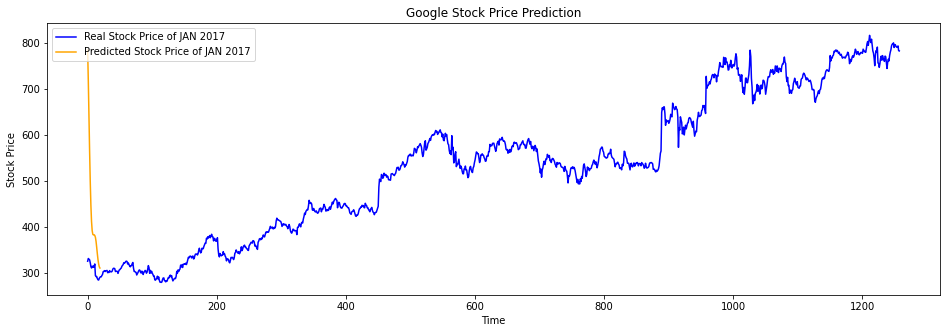

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price of JAN 2017')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted Stock Price of JAN 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()